   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


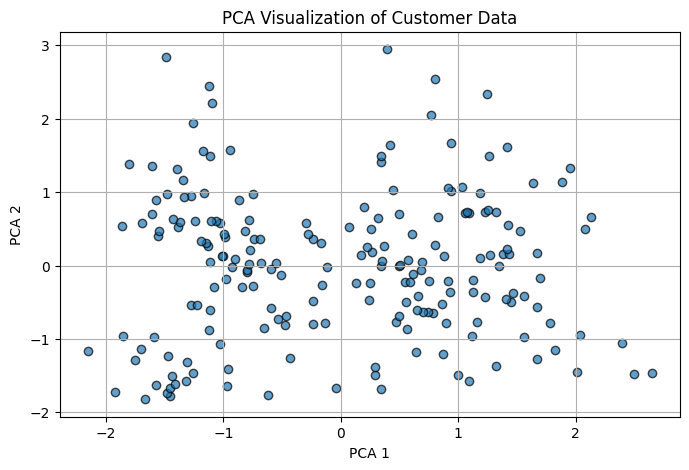

In [9]:
#1. Load and visualize dataset (optional PCA for 2D view)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:/Databases/Mall_Customers.csv")
print(df.head())
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', alpha=0.7)
plt.title("PCA Visualization of Customer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [10]:
#2. Fit K-Means and assign cluster labels
from sklearn.cluster import KMeans

# Apply K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels
print(df[['CustomerID', 'Cluster']].head())



   CustomerID  Cluster
0           1        2
1           2        2
2           3        3
3           4        2
4           5        2


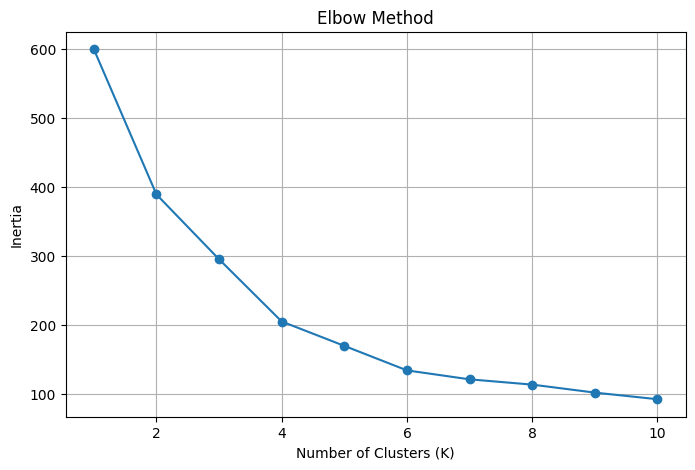

In [11]:
#3. Use the Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


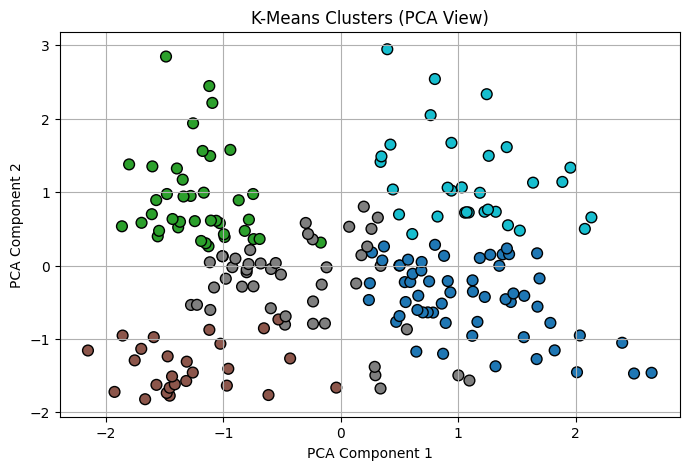

In [12]:
#4. Visualize clusters with color-coding
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', edgecolor='k', s=60)
plt.title("K-Means Clusters (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [13]:
#5. Evaluate clustering using Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.408
